In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

import random
import numpy as np
import DataPreprocessing
import SmartPolynomials
import SplitDataSet

In [23]:
# Random Model from Tensorflow Website
def build_model(components=1000, momentum=0.9, learning_rate=0.0006, activation='relu', hidden_layers=2):
    model = keras.Sequential([
        keras.layers.Dense(components, activation=activation, input_shape=[8]), #could try swish??  

        *[keras.layers.Dense(components, activation=activation)]*hidden_layers,
      
        keras.layers.Dense(1, activation='linear') 
    ])

    sgd=tf.keras.optimizers.SGD(learning_rate, momentum=momentum, nesterov=True)
    model.compile(loss='mse', 
                optimizer=sgd)
    return model

In [24]:
def run_model(mom_train, mom_test, me_train, me_test):
    model = build_model()

    scaler = StandardScaler()
   
    poly_train = np.array([np.ndarray.flatten(np.array(element)) for element in mom_train[:,1:]])
    poly_test = np.array([np.ndarray.flatten(np.array(element)) for element in mom_test[:,1:]])
    poly_train = scaler.fit_transform(poly_train) #Rescale on training set
    poly_test = scaler.transform(poly_test)   
    
    log_train = np.log(me_train)
    log_test = np.log(me_test)
    
    print('Mean : {}'.format(np.mean(log_test)))
    print('Std : {}'.format(np.std(log_test)))
        
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
    history = model.fit(poly_train, log_train, batch_size=132, epochs=1000, 
                    shuffle=True, verbose=1, callbacks=[callback], validation_split=0.1)
    
    
    try:
        me_predict = model.predict(poly_test, verbose=0) #Prediction on test set
        me_predict.shape = (len(me_predict))

        lin_mse = mean_squared_error(log_test, me_predict)
        lin_perc = 100*np.mean(np.divide(np.abs(me_test - np.exp(me_predict)), me_test))

        u=model.evaluate(poly_train, log_train)
        training_error = np.sqrt(u)
        test_error = np.sqrt(lin_mse)
        perc_error = lin_perc

        print('Training Error : {}'.format(training_error))
        print('Testing Error : {}'.format(test_error))
        print('Percentage Error : {}'.format(perc_error))
        
        return(training_error, test_error, perc_error, history)
    
    except ValueError:
        print('Value Error Encountered')       
        return(0, 0, 0)

In [ ]:
##Split by smallest S


me_train, mom_train = SplitDataSet.smallestS('LO/MG_uuxg_2/me_1000000.npy', 'LO/MG_uuxg_2/mom_1000000.npy', 1)
me_test, mom_test = SplitDataSet.smallestS('LO/MG_uuxg_2/me_100000.npy', 'LO/MG_uuxg_2/mom_100000.npy', 1)
#train_part, test_part, perc_part, hist_part = run_model(mom_train, mom_test, me_train, me_test)



Mean : -11.050215257522916
Std : 1.5004931766021485
Train on 67828 samples, validate on 7537 samples
Epoch 1/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 135us/step - loss: 2.4040 - val_loss: 0.1594

Epoch 2/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 131us/step - loss: 0.1506 - val_loss: 0.1143

Epoch 3/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 133us/step - loss: 0.1176 - val_loss: 0.0906

Epoch 4/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 132us/step - loss: 0.0958 - val_loss: 0.0740

Epoch 5/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 131us/step - loss: 0.0806 - val_loss: 0.0639

Epoch 6/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 132us/step - loss: 0.0692 -

67828/67828 [==============================]67828/67828 [==============================] - 9s 133us/step - loss: 0.0067 - val_loss: 0.0056

Epoch 112/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 132us/step - loss: 0.0067 - val_loss: 0.0051

Epoch 113/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 132us/step - loss: 0.0066 - val_loss: 0.0055

Epoch 114/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 132us/step - loss: 0.0064 - val_loss: 0.0055

Epoch 115/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 131us/step - loss: 0.0065 - val_loss: 0.0062

Epoch 116/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 131us/step - loss: 0.0066 - val_loss: 0.0050

Epoch 117/1000
67828/67828 [==============================]67828/67828 [=============

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



67828/67828 [==============================]67828/67828 [==============================] - 9s 131us/step - loss: 0.0056 - val_loss: 0.0046

Epoch 152/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 131us/step - loss: 0.0055 - val_loss: 0.0051

Epoch 153/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 131us/step - loss: 0.0056 - val_loss: 0.0067

Epoch 154/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 131us/step - loss: 0.0055 - val_loss: 0.0049

Epoch 155/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 132us/step - loss: 0.0054 - val_loss: 0.0055

Epoch 156/1000
67828/67828 [==============================]67828/67828 [==============================] - 9s 132us/step - loss: 0.0054 - val_loss: 0.0054

Epoch 157/1000
67828/67828 [==============================]67828/67828 [=============

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 0.0015 - val_loss: 0.0014

Epoch 8/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 131us/step - loss: 0.0013 - val_loss: 0.0013

Epoch 9/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 0.0011 - val_loss: 0.0011

Epoch 10/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 0.0010 - val_loss: 0.0010

Epoch 11/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 9.3699e-04 - val_loss: 9.2697e-04

Epoch 12/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 130us/step - loss: 8.5941e-04 - val_loss: 8.5814e-04

Epoch 13/1000
 48840/233100 [=====>...........

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



233100/233100 [==============================]233100/233100 [==============================] - 31s 134us/step - loss: 5.2875e-04 - val_loss: 5.3714e-04

Epoch 21/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.0573e-04 - val_loss: 5.1958e-04

Epoch 22/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.8523e-04 - val_loss: 4.9705e-04

Epoch 23/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.6581e-04 - val_loss: 4.7426e-04

Epoch 24/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 4.4849e-04 - val_loss: 4.5742e-04

Epoch 25/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.3269e-04 - val_loss: 4.4471e-04

Epoch 26/100

233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 1.3373e-04 - val_loss: 1.4480e-04

Epoch 120/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 1.3290e-04 - val_loss: 1.4227e-04

Epoch 121/1000
134112/233100 [================>.............]134112/233100 [================>.............] - ETA: 12s - loss: 1.3165e-04

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 1.2622e-04 - val_loss: 1.3594e-04

Epoch 131/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 1.2555e-04 - val_loss: 1.4090e-04

Epoch 132/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 1.2509e-04 - val_loss: 1.3466e-04

Epoch 133/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 1.2446e-04 - val_loss: 1.3434e-04

Epoch 134/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 1.2392e-04 - val_loss: 1.3296e-04

Epoch 135/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 130us/step - loss: 1.2330e-04 - val_loss: 1.3291e-04

Epoch 1


Epoch 179/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 1.0349e-04 - val_loss: 1.1243e-04

Epoch 180/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 131us/step - loss: 1.0322e-04 - val_loss: 1.1292e-04

Epoch 181/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 1.0281e-04 - val_loss: 1.1303e-04

Epoch 182/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 1.0247e-04 - val_loss: 1.1184e-04

Epoch 183/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 1.0217e-04 - val_loss: 1.1108e-04

Epoch 184/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 1.0184e-04 - val_loss: 1.1


Epoch 276/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 8.0023e-05 - val_loss: 8.9545e-05

Epoch 277/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 7.9824e-05 - val_loss: 8.8390e-05

Epoch 278/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 134us/step - loss: 7.9705e-05 - val_loss: 8.8634e-05

Epoch 279/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 7.9533e-05 - val_loss: 8.8389e-05

Epoch 280/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 7.9339e-05 - val_loss: 8.8025e-05

Epoch 281/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 7.9199e-05 - val_loss: 8.8


Epoch 373/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 130us/step - loss: 6.7161e-05 - val_loss: 7.5936e-05

Epoch 374/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 6.7011e-05 - val_loss: 7.5487e-05

Epoch 375/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 6.6928e-05 - val_loss: 7.5310e-05

Epoch 376/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 6.6862e-05 - val_loss: 7.5824e-05

Epoch 377/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 131us/step - loss: 6.6736e-05 - val_loss: 7.5960e-05

Epoch 378/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 6.6656e-05 - val_loss: 7.5


Epoch 470/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.8846e-05 - val_loss: 6.7984e-05

Epoch 471/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.8768e-05 - val_loss: 6.7364e-05

Epoch 472/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 5.8710e-05 - val_loss: 6.7238e-05

Epoch 473/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.8663e-05 - val_loss: 6.7286e-05

Epoch 474/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 5.8537e-05 - val_loss: 6.7793e-05

Epoch 475/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.8516e-05 - val_loss: 6.7


Epoch 567/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.2957e-05 - val_loss: 6.1366e-05

Epoch 568/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.2894e-05 - val_loss: 6.1206e-05

Epoch 569/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.2845e-05 - val_loss: 6.1334e-05

Epoch 570/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 5.2816e-05 - val_loss: 6.0971e-05

Epoch 571/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 5.2747e-05 - val_loss: 6.0947e-05

Epoch 572/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 5.2678e-05 - val_loss: 6.1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 5.0175e-05 - val_loss: 5.8959e-05

Epoch 625/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.0163e-05 - val_loss: 5.8667e-05

Epoch 626/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 5.0141e-05 - val_loss: 5.8342e-05

Epoch 627/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 5.0073e-05 - val_loss: 5.8605e-05

Epoch 628/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.0024e-05 - val_loss: 5.8138e-05

Epoch 629/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 5.0002e-05 - val_loss: 5.8143e-05

Epoch 6


Epoch 673/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.8135e-05 - val_loss: 5.6329e-05

Epoch 674/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.8085e-05 - val_loss: 5.6557e-05

Epoch 675/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.8022e-05 - val_loss: 5.6876e-05

Epoch 676/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.8004e-05 - val_loss: 5.6295e-05

Epoch 677/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 4.7962e-05 - val_loss: 5.6708e-05

Epoch 678/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.7907e-05 - val_loss: 5.6


Epoch 770/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 4.4612e-05 - val_loss: 5.3065e-05

Epoch 771/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.4607e-05 - val_loss: 5.2786e-05

Epoch 772/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.4551e-05 - val_loss: 5.2773e-05

Epoch 773/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 4.4523e-05 - val_loss: 5.3782e-05

Epoch 774/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 4.4485e-05 - val_loss: 5.2733e-05

Epoch 775/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.4447e-05 - val_loss: 5.2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.1671e-05 - val_loss: 4.9879e-05

Epoch 867/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 4.1646e-05 - val_loss: 5.0042e-05

Epoch 868/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 130us/step - loss: 4.1599e-05 - val_loss: 4.9614e-05

Epoch 869/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 130us/step - loss: 4.1581e-05 - val_loss: 4.9704e-05

Epoch 870/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 129us/step - loss: 4.1556e-05 - val_loss: 5.0301e-05

Epoch 871/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 4.1493e-05 - val_loss: 4.9534e-05

Epoch 8

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.1261e-05 - val_loss: 4.9197e-05

Epoch 882/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.1199e-05 - val_loss: 4.9528e-05

Epoch 883/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 4.1187e-05 - val_loss: 5.0002e-05

Epoch 884/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 4.1184e-05 - val_loss: 4.9013e-05

Epoch 885/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 4.1142e-05 - val_loss: 4.8968e-05

Epoch 886/1000
181236/233100 [======================>.......]181236/233100 [======================>.......] - ETA: 6s - loss: 4.1179e-05

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 4.0862e-05 - val_loss: 4.9040e-05

Epoch 896/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 131us/step - loss: 4.0866e-05 - val_loss: 4.9185e-05

Epoch 897/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 4.0825e-05 - val_loss: 4.9175e-05

Epoch 898/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 130us/step - loss: 4.0817e-05 - val_loss: 4.9276e-05

Epoch 899/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 4.0807e-05 - val_loss: 4.8671e-05

Epoch 900/1000
233100/233100 [==============================]233100/233100 [==============================] - 30s 131us/step - loss: 4.0769e-05 - val_loss: 4.8716e-05

Epoch 9

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.0496e-05 - val_loss: 4.8983e-05

Epoch 911/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.0490e-05 - val_loss: 4.8647e-05

Epoch 912/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.0444e-05 - val_loss: 4.8741e-05

Epoch 913/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.0418e-05 - val_loss: 4.9146e-05

Epoch 914/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 4.0412e-05 - val_loss: 4.8318e-05

Epoch 915/1000
233100/233100 [==============================]233100/233100 [==============================] - 32s 136us/step - loss: 4.0371e-05 - val_loss: 4.8928e-05

Epoch 9


Epoch 959/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 3.9331e-05 - val_loss: 4.7425e-05

Epoch 960/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 3.9302e-05 - val_loss: 4.7109e-05

Epoch 961/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 3.9255e-05 - val_loss: 4.7260e-05

Epoch 962/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 133us/step - loss: 3.9257e-05 - val_loss: 4.7184e-05

Epoch 963/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 131us/step - loss: 3.9223e-05 - val_loss: 4.7090e-05

Epoch 964/1000
233100/233100 [==============================]233100/233100 [==============================] - 31s 132us/step - loss: 3.9195e-05 - val_loss: 4.7

In [ ]:
print(np.argmin(np.array(final_error)[:,2]))
print(param_grid[19])

In [27]:
print(perc_large)

0.5301278000922883


In [14]:
print(param_grid)

[]


(0, 0.0001)

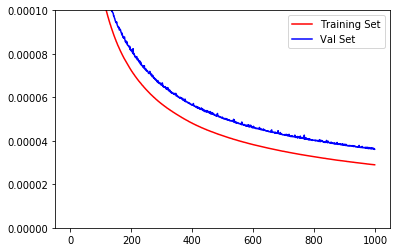

In [19]:
points = len(hist_large.history['loss'])
pyplot.plot(range(points), hist_large.history['loss'], color='r', label='Training Set')
pyplot.plot(range(points), hist_large.history['val_loss'],color='b', label='Val Set')
pyplot.legend()
pyplot.ylim(0,0.0001)
#pyplot.yscale('log')

In [22]:
print(test_large)

0.006018761284683872
